{% include toc title="On This Page" icon="file-text" %}

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

* Crop a raster dataset in **Python** using a vector extent object derived from a shapefile.
* Open a shapefile in **Python**.

</div>

In previous lessons, you reclassified a raster in **Python**; however, the edges of your raster dataset were uneven.

In this lesson, you will learn how to crop a raster - to create a new raster
object / file that you can share with colleagues and / or open in other tools such
as a Desktop GIS tool like QGIS.


## About Spatial Crop

Cropping (sometimes also referred to as clipping), is when you subset or make a dataset smaller, 
by removing all data outside of the crop area or spatial extent. In this case you have a large 
raster - but let's pretend that you only need to work with a smaller subset of the raster. 

You can use the `crop_image` function to remove all of the data outside of your study area.
This is useful as it:

1. Makes the data smaller and 
2. Makes processing and plotting faster

In general when you can, it's often a good idea to crop your raster data!

To begin let's load the libraries that you will need in this lesson. 


## Load Libraries

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from shapely.geometry import mapping
import rioxarray as rxr
import xarray as xr
import geopandas as gpd

import earthpy as et
import earthpy.plot as ep

# Prettier plotting with seaborn
sns.set(font_scale=1.5)

# Get data and set working directory
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Open Raster and Vector Layers

In the previous lessons, you worked with a raster layer that looked like the one below. Notice that the data have an uneven edge on the left hand side. Let's pretend this edge is outside of your study area and you'd like to remove it or clip it off using your study area extent. You can do this using the `crop_image()` function in `earthpy.spatial`. 

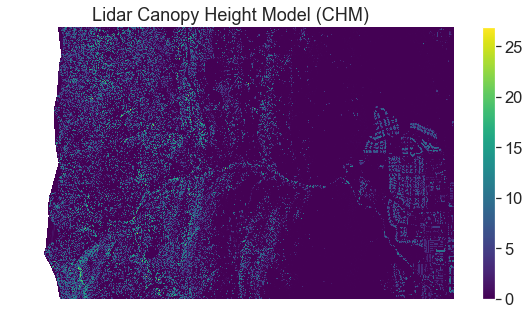

In [15]:
lidar_chm_path = os.path.join("colorado-flood", 
                              "spatial"
                              "boulder-leehill-rd",
                              "outputs",
                              "lidar_chm.tif")

lidar_chm_im = rxr.open_rasterio("colorado-flood/spatial/boulder-leehill-rd/outputs/lidar_chm.tif",
                                 masked=True).squeeze()

f, ax = plt.subplots(figsize=(10, 5))
lidar_chm_im.plot.imshow()
ax.set(title="Lidar Canopy Height Model (CHM)")

ax.set_axis_off()
plt.show()

## Open Vector Layer

To begin your clip, open up a vector layer that contains the crop extent that you want
to use to crop your data. To open a shapefile you use the `gpd.read_file()` function
from geopandas. You will learn more about vector data in Python in a few weeks.

In [4]:
# crop_extent = crop_extent.to_crs(epsg='32613')

In [7]:
aoi = os.path.join("colorado-flood",
                   "spatial",
                   "boulder-leehill-rd",
                   "clip-extent.shp")

# Open crop extent (your study area extent boundary)
crop_extent = gpd.read_file(aoi)

Next, view the coordinate reference system (CRS) of both of your datasets. 
Remember that in order to perform any analysis with these two datasets together,
they will need to be in the same CRS. 

In [6]:
print('crop extent crs: ', crop_extent.crs)
print('lidar crs: ', lidar_chm_im.rio.crs)

crop extent crs:  epsg:32613
lidar crs:  EPSG:32613


In [7]:
# # plotting with cartopy
# crs = cp.crs.epsg('32613')
# fig, ax = plt.subplots(subplot_kw={'projection': crs})
# ax.add_geometries(crop_extent['geometry'], crs=crs)
# ax.set(xlim=crop_extent.bounds[['minx', 'maxx']].values[0],
#        ylim=crop_extent.bounds[['miny', 'maxy']].values[0])

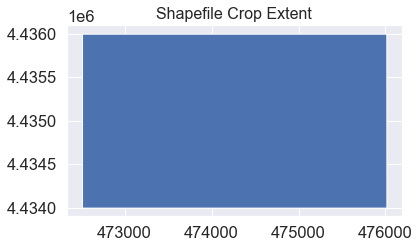

In [8]:
# Plot the crop boundary layer
# Note this is just an example so you can see what it looks like
# You don't need to plot this layer in your homework!
fig, ax = plt.subplots(figsize=(6, 6))

crop_extent.plot(ax=ax)

ax.set_title("Shapefile Crop Extent",
             fontsize=16)
plt.show()

<figure>
    <a href="{{ site.url }}/images/earth-analytics/spatial-data/spatial-extent.png">
    <img src="{{ site.url }}/images/earth-analytics/spatial-data/spatial-extent.png" alt="The spatial extent of a shapefile the geographic edge or location that is the furthest north, south east and west."></a>
    <figcaption>The spatial extent of a shapefile represents the geographic "edge" or location that is the furthest north, south east and west. Thus is represents the overall geographic coverage of the spatial
    object. Image Source: Colin Williams, NEON.
    </figcaption>
</figure>


Now that you have imported the shapefile. You can use the `crop_image` function from `earthpy.spatial` to crop the raster data using the vector shapefile.

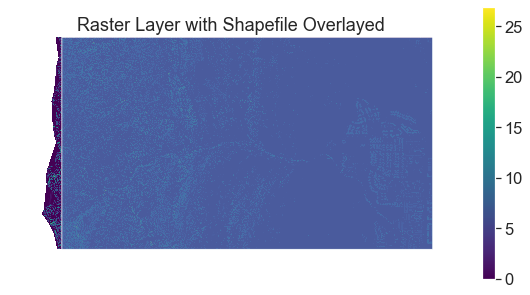

In [9]:
f, ax = plt.subplots(figsize=(10, 5))
lidar_chm_im.plot.imshow(ax=ax)

crop_extent.plot(ax=ax,
                 alpha=.8)
ax.set(title="Raster Layer with Shapefile Overlayed")

ax.set_axis_off()
plt.show()

## Clip Raster Data Using RioXarray `.clip`

If you want to crop the data you can use the `rio.clip` function. When you clip
the data, you can then export it and share it with colleagues. Or use it in 
another analysis. 


To perform the clip you:

1. Open the raster dataset that you wish to crop using xarray or rioxarray.
2. Open your shapefile as a geopandas object.
3. Crop the data using the `.clip()` function. 

`.clip` has several parameters that you can consider including

* `drop = True` : The default. setting it will drop all pixels outside of the clip extent
* `invert = False` : The default. If set to true it will clip all data INSIDE of the clip extent
* `crs` : if your shapefile is in a different CRS than the raster data, pass the CRS to ensure the data are clipped correctly. 

Below you clip the data to the extent of the AOI geodataframe imported above. 
The data are then plotted.

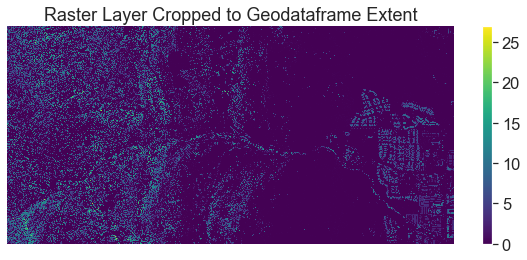

In [10]:
lidar_clipped = lidar_chm_im.rio.clip(crop_extent.geometry.apply(mapping),
                                      # This is needed if your GDF is in a diff CRS than the raster data
                                      crop_extent.crs)

f, ax = plt.subplots(figsize=(10, 4))
lidar_clipped.plot(ax=ax)
ax.set(title="Raster Layer Cropped to Geodataframe Extent")
ax.set_axis_off()
plt.show()

In [11]:
# NOTE: you only need to use cartopy to use `add_geometries`.
# If you don't need to use that method, you can just use geopandas/vanilla matplotlib
# ax.add_geometries(crop_extent['geometry'], crs=cp.crs.PlateCarree())

In [12]:
# fig, ax = plt.subplots()
# im = ax.imshow(lidar_chm_im, cmap='terrain', extent=bounds)
# ax.set(xlim=[crop_bounds[0], crop_bounds[2]], ylim=[crop_bounds[1], crop_bounds[3]])
# crop_extent.plot(ax=ax,
#                  linewidth=3,
#                  alpha=.5);

## Crop Data Using the `crop_image` Function

If you want to crop the data you can use the `crop_image` function in `earthpy.spatial`. When you crop the data, you can then export it and share it with colleagues. Or use it in another analysis. IMPORTANT: You do not need to read the data in before cropping! Cropping the data can be your first step.

To perform the crop you:

1. Create a connection to the raster dataset that you wish to crop
2. Open your shapefile as a geopandas object. This is what EarthPy needs to crop the data to the extent of your vector shapefile.
3. Crop the data using the `crop_image()` function. 

Without EarthPy, you would have to perform this with a Geojson object. Geojson is a format that is worth becoming familiar with. It's a text, structured format that is used in many online applications. We will discuss it in  more detail later in the class. For now, have a look at the output below. 

In [13]:
# lidar_chm_path = os.path.join("colorado-flood",
#                               "spatial",
#                               "boulder-leehill-rd",
#                               "outputs",
#                               "lidar_chm.tif")

# with rio.open(lidar_chm_path) as lidar_chm:
#     lidar_chm_crop, lidar_chm_crop_meta = es.crop_image(lidar_chm,crop_extent)

# lidar_chm_crop_affine = lidar_chm_crop_meta["transform"]

# # Create spatial plotting extent for the cropped layer
# lidar_chm_extent = plotting_extent(lidar_chm_crop[0], lidar_chm_crop_affine)

Finally, plot the cropped data. Does it look correct?

In [14]:
# # Plot your data
# ep.plot_bands(lidar_chm_crop[0],
#               extent=lidar_chm_extent,
#               cmap='Greys',
#               title="Cropped Raster Dataset",
#               scale=False)
# plt.show()

<div class="notice--info" markdown="1">
## OPTIONAL -- Export Newly Cropped Raster

Once you have cropped your data, you may want to export it to a new geotiff file,
just like you did in previous lessons. 

You can so this using rioxarray too!

</div>

In [15]:
path_to_tif_file = os.path.join("colorado-flood",
                                "spatial",
                                "outputs",
                                "lidar_chm_cropped.tif")

# Write the data to a new geotiff file
lidar_clipped.rio.to_raster(path_to_tif_file)

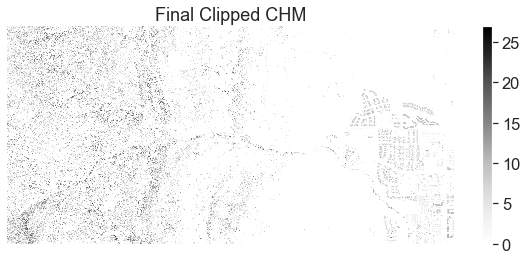

In [16]:
# Open the data you wrote out above
clipped_chm = rxr.open_rasterio(path_to_tif_file)

# Customize your plot as you wish!
f, ax = plt.subplots(figsize=(10, 4))
clipped_chm.plot(ax=ax,
                 cmap='Greys')
ax.set(title="Final Clipped CHM")
ax.set_axis_off()
plt.show()

In [17]:
# # Update with the new cropped affine info and the new width and height
# lidar_chm_meta.update({'transform': lidar_chm_crop_affine,
#                        'height': lidar_chm_crop.shape[1],
#                        'width': lidar_chm_crop.shape[2],
#                        'nodata': -999.99})
# lidar_chm_meta

Once you have updated the metadata you can write our your new raster. 

In [18]:
# # Write data
# path_to_tif_file = os.path.join("colorado-flood",
#                         "spatial",
#                         "outputs",
#                         "lidar_chm_cropped.tif")

# with rio.open(path_out, 'w', **lidar_chm_meta) as ff:
#     ff.write(lidar_chm_crop[0], 1)

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Optional Challenge: Crop Change Over Time Layers

In the previous lesson, you created 2 plots:

1. A classified raster map that shows **positive and negative change** in the canopy
height model before and after the flood. To do this you will need to calculate the
difference between two canopy height models.
2. A classified raster map that shows **positive and negative change** in terrain
extracted from the pre and post flood Digital Terrain Models before and after the flood.

Create the same two plots except this time CROP each of the rasters that you plotted
using the shapefile: `data/week-03/boulder-leehill-rd/crop_extent.shp`

For each plot, be sure to:

* Add a legend that clearly shows what each color in your classified raster represents.
* Use proper colors.
* Add a title to your plot.

You will include these plots in your final report due next week.
</div>